In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import os

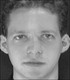

In [ ]:
img=Image.open('1_1.jpg')
a='1_1.jpg'
type(img)
import cv2
img1 = cv2.imread(a, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path='/content/gdrive/MyDrive/Faces - Copy (2)'
data=[]
labels=[]
for filename in os.listdir(path):
    # print(filename)
    f = os.path.join(path, filename)
    images = os.listdir(f)
    for i in images:
      image=Image.open(f+'/'+ i).convert('L')
      image=image.resize((80,70))
      image=np.array(image)
      data.append(image)
      labels.append(filename)


In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data[0].shape)

(70, 80)


In [ ]:
labels = labels.astype(np.int)

In [ ]:
data = np.array(data,dtype='float32')/255

In [ ]:
print(labels)

[ 4  4  4  4  4  4  4  4  4  4 40 40 40 40 40 40 40 40 40 40 38 38 38 38
 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39  7  7  7  7  7  7  7  7
  7  7  6  6  6  6  6  6  6  6  6  6  9  9  9  9  9  9  9  9  9  9  5  5
  5  5  5  5  5  5  5  5 37 37 37 37 37 37 37 37 37 37  8  8  8  8  8  8
  8  8  8  8 32 32 32 32 32 32 32 32 32 32 36 36 36 36 36 36 36 36 36 36
 29 29 29 29 29 29 29 29 29 29 31 31 31 31 31 31 31 31 31 31 34 34 34 34
 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35 30 30 30 30 30 30 30 30
 30 30 33 33 33 33 33 33 33 33 33 33 28 28 28 28 28 28 28 28 28 28  3  3
  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2 20 20 20 20 20 20
 20 20 20 20 21 21 21 21 21 21 21 21 21 21 24 24 24 24 24 24 24 24 24 24
 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 25 25 25 25
 25 25 25 25 25 25 19 19 19 19 19 19 19 19 19 19 23 23 23 23 23 23 23 23
 23 23 22 22 22 22 22 22 22 22 22 22 17 17 17 17 17 17 17 17 17 17 10 10
 10 10 10 10 10 10 10 10 15 15 15 15 15 15 15 15 15

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
for a in y_test:
  print(np.argmax(a))
# np.argmax(y_test)

In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(
    X_train, y_train, test_size=.05, random_state=1234,)

In [ ]:
#to_categorical Converts a class vector (integers) to binary class matrix.
y_train = to_categorical(y_train,41)
y_valid = to_categorical(y_valid,41)
y_test = to_categorical(y_test,41)

In [ ]:
x_valid.shape
# print(x_train.shape,x_valid.shape)

(17, 70, 80)

In [ ]:
x_train.shape[1:]
x_train = tf.expand_dims(x_train, axis =-1)
x_valid = tf.expand_dims(x_valid, axis =-1)
x_test = tf.expand_dims(x_test, axis =-1)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(41, activation='softmax'))

#Compilation of the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 76, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 72, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 34, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 16, 64)        0

In [ ]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/100
1/1 - 12s - loss: 3.7190 - accuracy: 0.0193 - val_loss: 3.8029 - val_accuracy: 0.0588
Epoch 2/100
1/1 - 11s - loss: 3.7041 - accuracy: 0.0193 - val_loss: 3.7865 - val_accuracy: 0.0588
Epoch 3/100
1/1 - 11s - loss: 3.6861 - accuracy: 0.0418 - val_loss: 3.7623 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 - 11s - loss: 3.6714 - accuracy: 0.0579 - val_loss: 3.7708 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 - 11s - loss: 3.6443 - accuracy: 0.0643 - val_loss: 3.7935 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 - 11s - loss: 3.6413 - accuracy: 0.0450 - val_loss: 3.7403 - val_accuracy: 0.0588
Epoch 7/100
1/1 - 11s - loss: 3.5886 - accuracy: 0.0900 - val_loss: 3.7188 - val_accuracy: 0.1176
Epoch 8/100
1/1 - 11s - loss: 3.5551 - accuracy: 0.0965 - val_loss: 3.6922 - val_accuracy: 0.0588
Epoch 9/100
1/1 - 11s - loss: 3.4962 - accuracy: 0.0997 - val_loss: 3.6498 - val_accuracy: 0.1176
Epoch 10/100
1/1 - 11s - loss: 3.4428 - accuracy: 0.1190 - val_loss: 3.5597 - val_accuracy: 0.2353
Epoch 1

In [ ]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.2538
test acc 0.9268


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


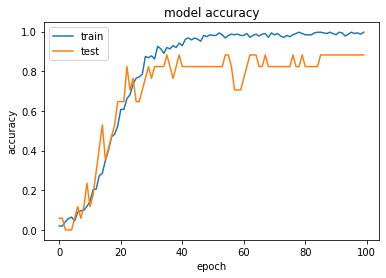

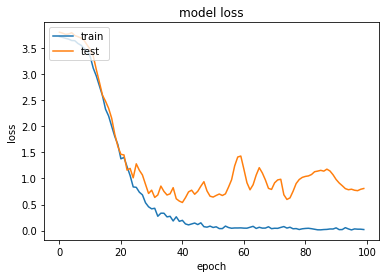

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predicted =np.array( cnn_model.predict(x_test))

a=[]
b=[]
for i in predicted:
  a.append(np.argmax(i))
for j in y_test:
  b.append(np.argmax(j))
a=np.array(a)
b=np.array(b)

In [ ]:
Acc=accuracy_score(b, a)
print("accuracy : ")
print(Acc)

accuracy : 
0.926829268292683
